Analysis the trend of Suicide Rate in England between 1981 and 2020.


Data collected from ONS https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/suicidesintheunitedkingdomreferencetables 

In [4]:
# import basic libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Import Dataset 
suicide = pd.read_csv("Data/suicide_england.csv")

In [8]:
# view suicide
suicide

,Year,Country,Sex,Age_Group,Suicide_Total,Suicide_Rate
0,2020,England,F,15-19 Years,41,2.7
1,2019,England,F,15-19 Years,58,3.9
2,2018,England,F,15-19 Years,57,3.8
3,2017,England,F,15-19 Years,51,3.4
4,2016,England,F,15-19 Years,41,2.6
...,...,...,...,...,...,...
1275,1985,England,F,90+ Years,13,9.7
1276,1984,England,F,90+ Years,12,9.3
1277,1983,England,F,90+ Years,10,8.0
1278,1982,England,F,90+ Years,12,9.9


In [9]:
# check for null values 
suicide.isnull().sum()

Year             0
Country          0
Sex              0
Age_Group        0
Suicide_Total    0
Suicide_Rate     0
dtype: int64

Mean suicide rates by sex 
Suicide rates are higher in male population 

In [ ]:
suicide.groupby(["Sex"])["Suicide_Rate"].mean()

Mean Suicide Rates by Age Group
Suicide rates higher in people aged 80 and above; also rate higher in people aged between 40 and 54

In [ ]:
suicide.groupby("Age_Group")["Suicide_Rate"].mean()

Mean suicide rates by sex and Age Group 
Irrespective of age group, suicide rate is higher in male population 

In [ ]:
suicide.groupby(["Sex", "Age_Group"])["Suicide_Rate"].mean()

Exploratory Data Analysis- Visualizing the rate of suicide 

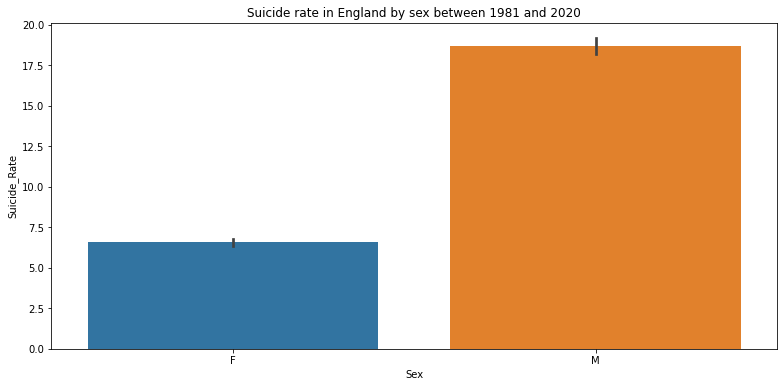

In [10]:
# Visualize suicide rate by sex 
plt.figure(figsize= (13,6))
sns.barplot(data= suicide, x = "Sex", y = "Suicide_Rate")
plt.title("Suicide rate in England by sex between 1981 and 2020")

plt.show()

The bar chart shows that there is a higher suicide rate in male population 

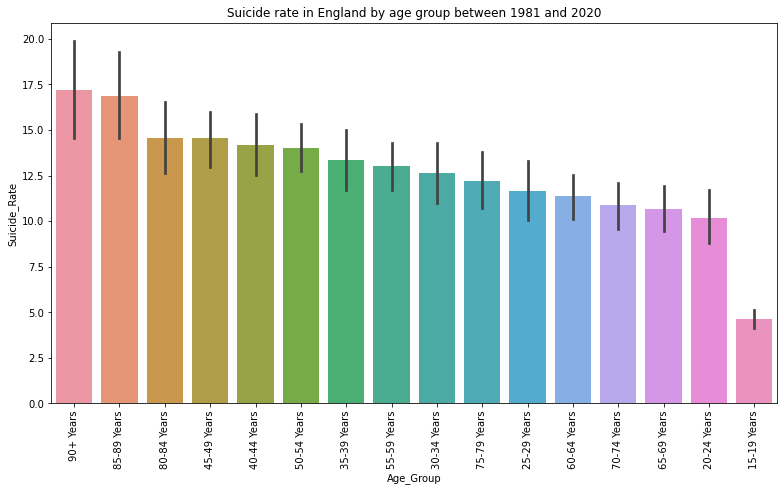

In [11]:

# Suicide rate by age group

order = suicide.groupby(["Age_Group"])["Suicide_Rate"].mean().sort_values( ascending=False).index  # order the bar by suicide rate for easy comparison

plt.figure(figsize=(13,7))
sns.barplot(data=suicide, x="Age_Group", y = "Suicide_Rate", order= order)
plt.title("Suicide rate in England by age group between 1981 and 2020")
plt.xticks(rotation = 90)
plt.show()

Suicide rates is highest in people aged 90+ and lowest among young persons aged 15-19

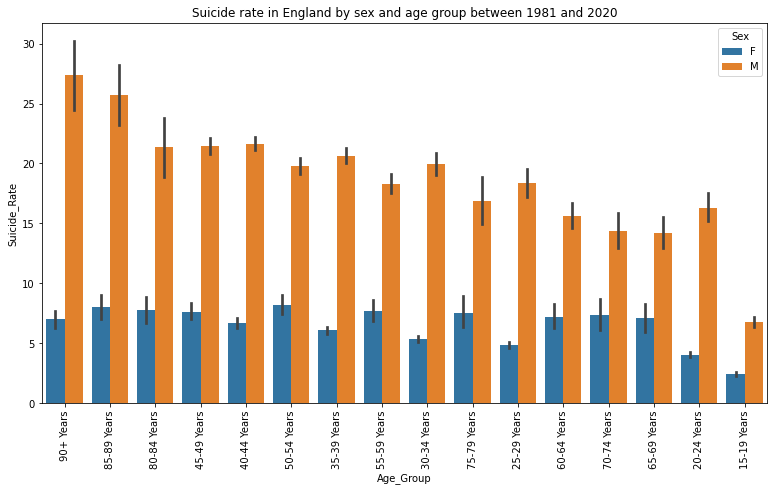

In [12]:
# Suicide rate by age group and sex
plt.figure(figsize= (13,7))
sns.barplot(data= suicide, x = "Age_Group", y = "Suicide_Rate", hue="Sex", order= order)
plt.xticks(rotation = 90)
plt.title("Suicide rate in England by sex and age group between 1981 and 2020")
plt.show()

The graph shows that men are more likely to commit suicide across all age groups 

What is the trend of suicide for the review period

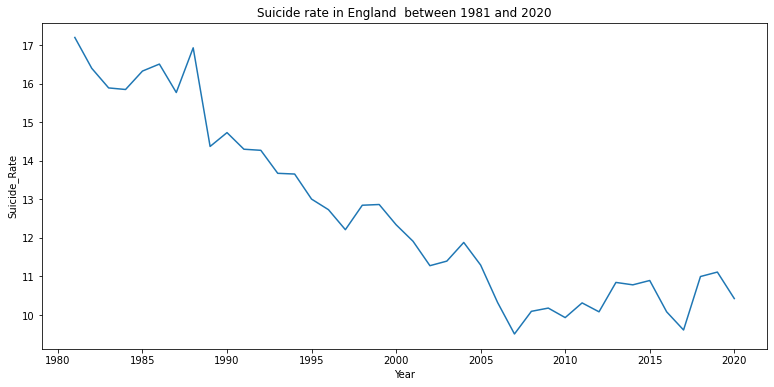

In [13]:
plt.figure(figsize=(13,6))
sns.lineplot(data= suicide, x = "Year", y = "Suicide_Rate", err_style=None)
plt.title("Suicide rate in England  between 1981 and 2020")
plt.show()

Rate of suicide was highest in 1981, has been on average trending lower, reached its lowest around 2007 and started increasing again

Let see if there is difference in the trend of suicidse rate over the review period by sex 

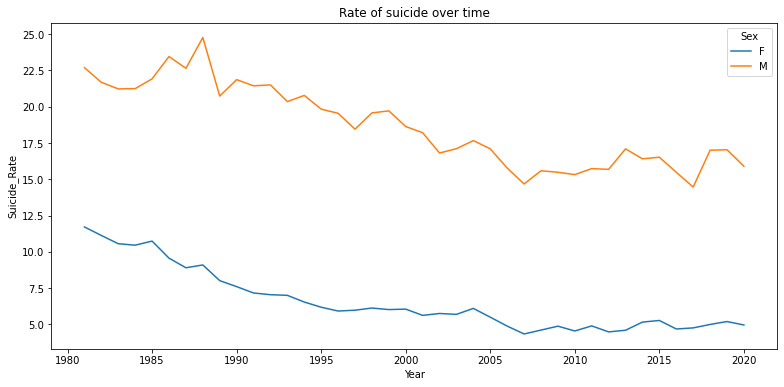

In [14]:
plt.figure(figsize=(13,6))
sns.lineplot(data=suicide, x = "Year", y = "Suicide_Rate", err_style=None, hue="Sex")
plt.title("Rate of suicide over time")

plt.show()

Male suicide rates has been nearly twice higher in every year over the review period. 

Trend of Suicide rate by age group over time

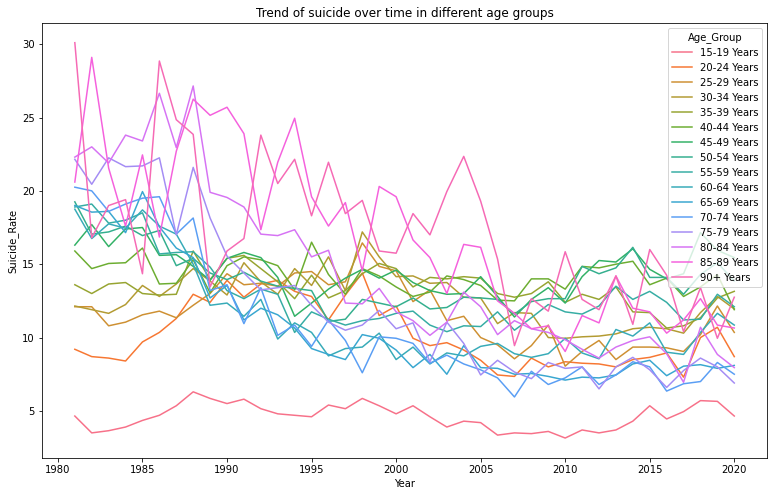

In [15]:
plt.figure(figsize=(13,8))
sns.lineplot(data= suicide, x = "Year", y = "Suicide_Rate", hue = "Age_Group", err_style= None)
plt.title("Trend of suicide over time in different age groups")
plt.show()

The plot looks jaggardy and difficult to read, Lets use facet grid to seperate the age group

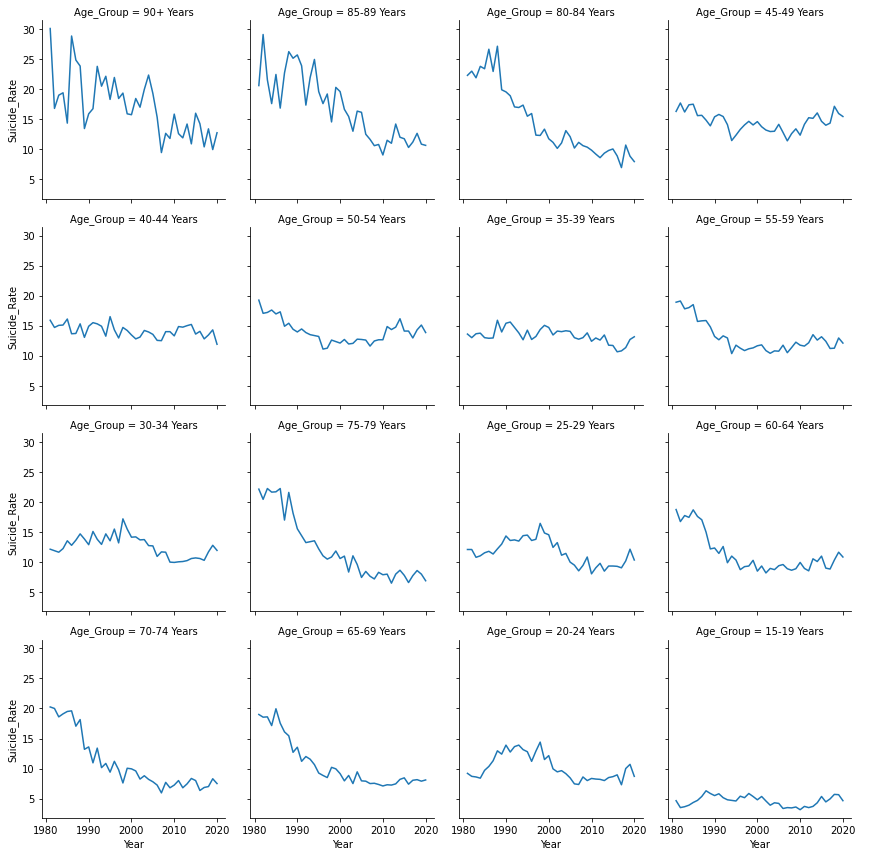

In [16]:
order = suicide.groupby(["Age_Group"])["Suicide_Rate"].mean().sort_values( ascending=False).index

g = sns.FacetGrid(suicide, col="Age_Group", col_wrap=4, col_order=order)
g.map(sns.lineplot, "Year", "Suicide_Rate", err_style = None)
g.add_legend()

plt.show()

People aged 80 and over has the highest suicide rate over the review period. However, this has been declining over the years. 
In contrast, there is an increase in the suicide rate in people aged 45-49 years.
There is also considerbaly high rate of suicide in people aged 40-44, 50-54, 35-39, 30-34

Lets compare the trend of rate of suicide rate by age group and sex

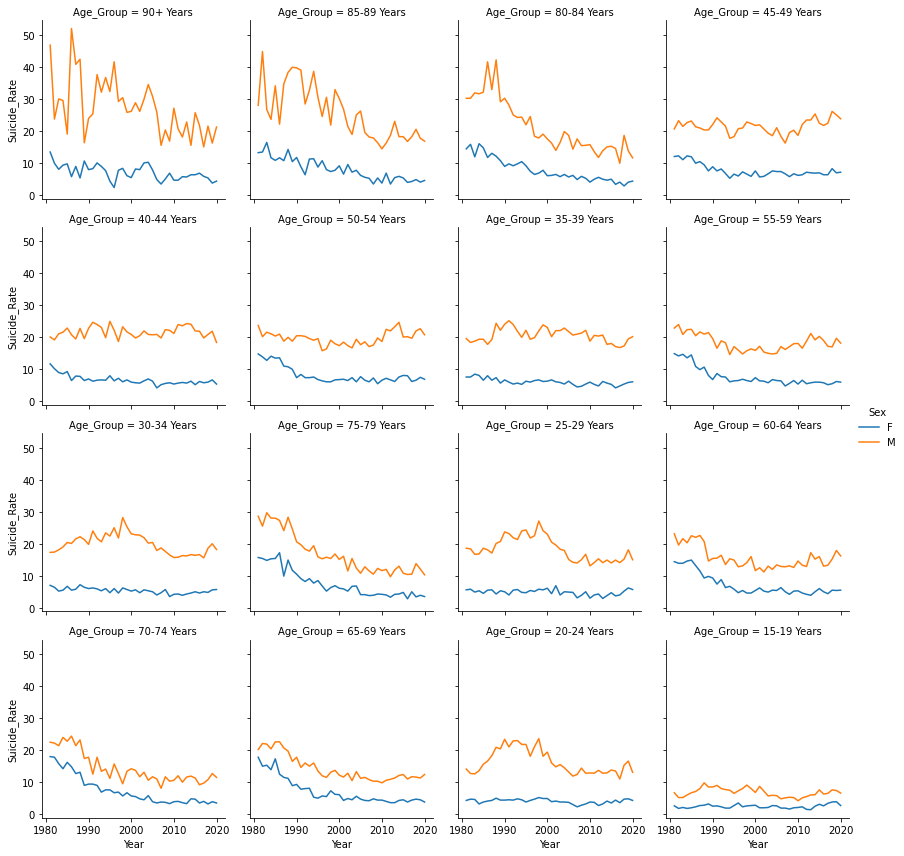

In [17]:
order = suicide.groupby(["Age_Group"])["Suicide_Rate"].mean().sort_values( ascending=False).index

g = sns.FacetGrid(suicide, col="Age_Group", col_wrap=4, col_order=order,  hue = "Sex")
g.map(sns.lineplot, "Year", "Suicide_Rate", err_style = None)
g.add_legend()
plt.show()

Clear pattern  of higher suicide trend in male population compared to female

Conclusion:

1.  The above visualisation shows that suicide is significantly higher in male population compared to female; irrespective of age group. 
2.  Certain age group are more likely to commit suicide than others 
3.  Generally, there has been reduction in the trend of suicide rate over the review period 
4.  Prevention interventions need to target the gender and age group at higher risk of suicide 
5.  Research needs to focused on other risk predictors for suicide

